In [1]:
#   Problem 2: Rotation curves, Data



#I answer part a) through d)  in individual cells

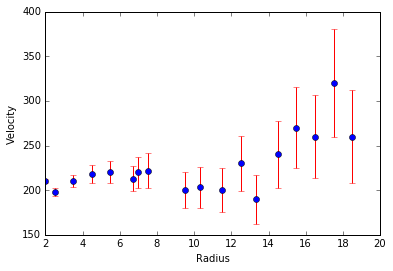

In [3]:
# part a) Plotting data with error bars #########################################################################




import matplotlib.pyplot as plt

import numpy as np


%matplotlib inline


s="2 210 2.5 198 3.5 210 4.5 218 5.5 220 6.7 213 7 220 7.5 222 9.5 200 10.3 203 11.5 200 12.5 230 13.3 190 14.5 240 15.5 270 16.5 260 17.5 320 18.5 260"


data=map(float,s.split())


r=[]

v=[]

for i, x in enumerate(data):
    
    if i %2==0:
        r.append(x)
        
    else:
        v.append(x)

e=range(len(v))
        
for i in range(len(v)):
    e[i]=v[i]*0.2*(i+1)/len(v)

plt.errorbar(r, v, yerr=e, fmt='o', ecolor='r', label='velocity')



plt.ylabel('Velocity')
plt.xlabel('Radius')




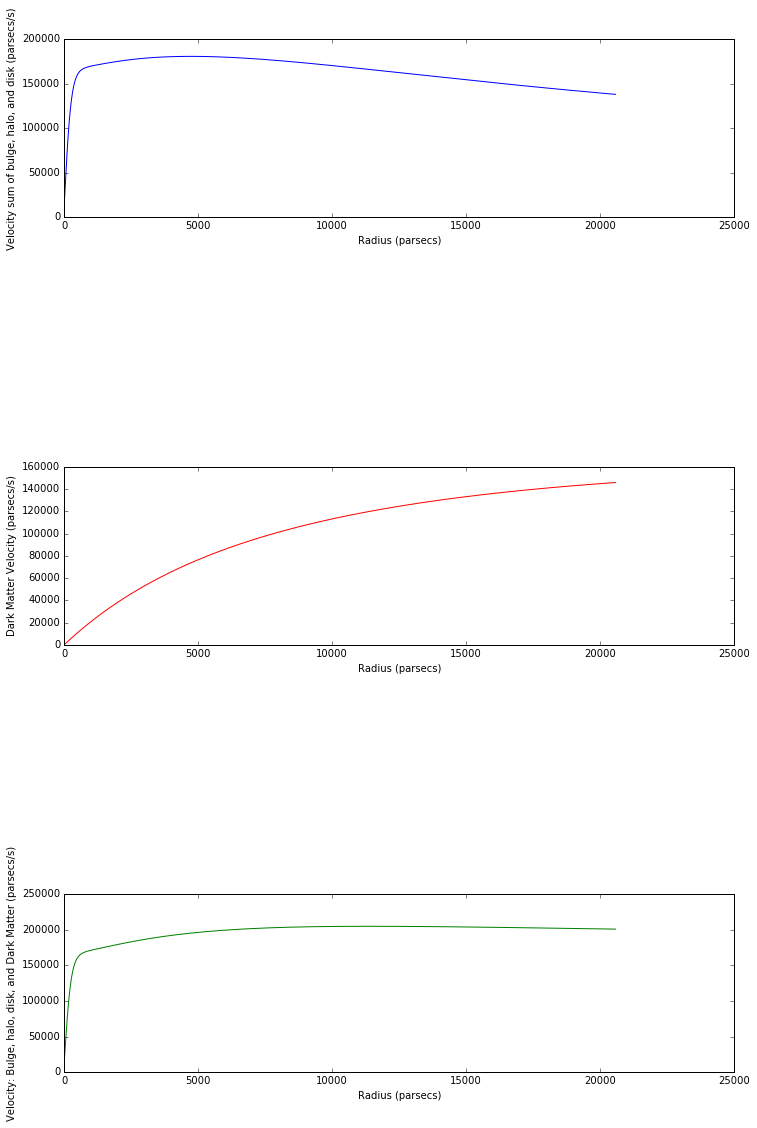

In [5]:
# part b) Plotting rotation curves  #####################################################################################





import matplotlib.pyplot as plt                               #importing packages

import numpy as np

from scipy.integrate import odeint


%matplotlib inline


from math import *





Ms=1.989*(10**30)                                             #Constant values for mass and scale height

M1= (1.3*10**10)*Ms                                                      

a1=0.4*3.086E19



M2=1E9

a2=0.5



M3=(6.5*10**10)*Ms

a3=4.0*3.086E19



M4=(6*10**12)*Ms  

a4=12*3.086E19



def dmdr_bulge(r):                                            #defining functions for mass enclosed
   
    rho1=(M1/(4*np.pi*pow(a1,3.0)))*((1+ (r/a1)**2.0)**(-5/2))
    
    dmdr_b=4*np.pi*(pow(r,2))*rho1
    
    return dmdr_b


def dmdr_halo(r):
    
    rho2= (M2*((a2 + (r/3.086E19)))**(-3.1))*(Ms/((3.086E19)**3))
    
    dmdr_h=4*np.pi*pow(r,2)*rho2
    
    return dmdr_h


def dmdr_disk(r):
    
    rho3= (M3/(2*np.pi*np.power(a3,2.0))) * (np.exp(-(r)/a3))
    
    dmdr_d= (2*np.pi*r)*rho3
    
    return dmdr_d


def dmdr_DarkMatter(r):
    rho4= (M4*((a4 + (r)))**(-3.1))
    
    dmdr_DM=4*np.pi*pow(r,2)*rho4
    
    return dmdr_DM


#def dmdr_DarkMatter(r):
        
#    rho4=(p_crit*Sc)/((r/rs)*(1+(r/rs))**2)
    
#    dmdr_DM=4*np.pi*pow(r,2)*rho4
    
#    return dmdr_DM



def velocity(L, r):                                                 #velocity function
        
    v=np.sqrt((6.67E-11)*L/r)
    
    return v


start = 0.1                                                         # Creating values of radius
end = 20.0*3.086E19
samples = 1000

dr = end/samples

r=np.linspace(start, end, samples)                                  




m_bulge=[dr*dmdr_bulge(r[x]) for x in range(samples)]                 # Creating an arrays for mass enclosed

m_halo=[dr*dmdr_halo(r[x]) for x in range(samples)]

m_disk=[(dr*dmdr_disk(r[x])) for x in range(samples)]

m_tot=[dr*(dmdr_halo(r[x])+dmdr_bulge(r[x])+dmdr_disk(r[x])) for x in range(samples)]

DM=[(dr*dmdr_DarkMatter(r[x])) for x in range(samples)]

total_mass=[dr*(dmdr_halo(r[x])+dmdr_bulge(r[x])+dmdr_disk(r[x]) + dmdr_DarkMatter(r[x])) for x in range(samples)]

#T_mass=[dr*(m_tot(r[x])+ dmdr_DarkMatter(r[x])) for x in range(samples)]



for i in range(samples):                                            # Computing mass enclosed and storing values in array
    if i == 0:
        m_bulge[i] = m_bulge[i]
    else:
        m_bulge[i] += m_bulge[(i-1)]

for i in range(samples):
    if i == 0:
        m_halo[i] = m_halo[i]
    else:
        m_halo[i] += m_halo[(i-1)]
        
for i in range(samples):                                           
    if i == 0:
        m_disk[i] = m_disk[i]
    else:
        m_disk[i] += m_disk[(i-1)]        
        
for i in range(samples):
    if i == 0:
        m_tot[i] = m_tot[i]
    else:
        m_tot[i] += m_tot[(i-1)]
        
for i in range(samples):                                            
    if i == 0:
        DM[i] = DM[i]
    else:
        DM[i] += DM[(i-1)]        
               
for i in range(samples):                                            
    if i == 0:
        total_mass[i] = total_mass[i]
    else:
        total_mass[i] += total_mass[(i-1)]
        
#for i in range(samples): 
#    if i == 0:
#        T_mass[i] = T_mass[i]
#    else:
#        T_mass[i] += T_mass[(i-1)]
        
                                
        
        
v_tot=[velocity(m_tot[x],r[x]) for x in range(samples)]               # Computing total velocity (no Dark Matter)


DM_velocity=[velocity(DM[x], r[x]) for x in range(samples)]           #Dark Matter velocity


total_velocity=[velocity(total_mass[x], r[x]) for x in range(samples)] # mass total plus dark matter velocity



fig= plt.figure(1, figsize=(12,30))                                   # Plotting Rotation Curves

#ax1 = fig.add_subplot(811)                                            #total mass versus radius
#ax1.plot(r, m_tot, 'y')
#ax1.set_xlabel('Radius')
#ax1.set_ylabel('Mass sum of bulge, halo, and disk')

ax1 = fig.add_subplot(812)                                            #Total velocity versus radius
ax1.plot(r/(3*1E16), v_tot)
ax1.set_xlabel('Radius (parsecs)')
ax1.set_ylabel('Velocity sum of bulge, halo, and disk (parsecs/s)')

#ax1 = fig.add_subplot(813)                                           #Dark Matter mass versus radius
#ax1.plot(r, DM, 'y')
#ax1.set_xlabel('Radius')
#ax1.set_ylabel('Dark Matter Mass')

ax1 = fig.add_subplot(814)                                             #Dark Matter velocity versus radius
ax1.plot(r/(3*1E16), DM_velocity, 'r')
ax1.set_xlabel('Radius (parsecs)')
ax1.set_ylabel('Dark Matter Velocity (parsecs/s)')

#ax1 = fig.add_subplot(815)                                             #mass total plus Dark Matter velocity versus radius
#ax1.plot(r, total_mass, 'y')
#ax1.set_xlabel('Radius')
#ax1.set_ylabel('Mass: Bulge, halo, disk, and Dark Matter')

ax1 = fig.add_subplot(816)                                             #velocity total plus Dark Matter velocity versus radius
ax1.plot(r/(3*1E16), total_velocity, 'g')
ax1.set_xlabel('Radius (parsecs)')
ax1.set_ylabel('Velocity: Bulge, halo, disk, and Dark Matter (parsecs/s)')


In [ ]:
# part c) No, I need to add mass and rotational speed of dark matter.

In [6]:
# part d)  I used Mass=(6*10**12)*Ms and a=12*3.086E19.